In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

hollywood_movies = pd.read_csv("f:/MEGA/ML/Dataquest/hollywood_movies.csv")
hollywood_movies.head()

hollywood_movies["exclude"].value_counts()

hollywood_movies.drop("exclude", axis=1, inplace=True)
hollywood_movies.head()

,Year,Film,Lead Studio,Critic Rating,Audience Rating,Story,Genre,Opening Weekend Theaters,Opening Weekend per Cinema,Domestic Gross,Foreign Gross,Worldwide Gross,Budget,Profitability,Opening Weekend Revenue,Oscar
0,2011,Average,NaN,52.84,61.42,NaN,NaN,2810.31,8764.92,61.33,93.53,144.86,52.25,3.4200,20.14,NaN
1,2011,The Tree Of Life,Independant,84.00,61.00,Discovery,Drama,4.00,93230.00,13.30,41.00,54.30,32.00,1.6970,0.37,NaN
2,2011,Midnight in Paris,Sony,93.00,84.00,Love,Romance,944.00,61777.00,56.18,83.00,139.18,17.00,8.1869,5.83,NaN
3,2011,Harry Potter and the Deathly Hallows Part 2,Warner Bros,96.00,92.00,Rivalry,Fantasy,4375.00,38672.00,381.01,947.10,1328.11,125.00,10.6249,169.19,NaN
4,2011,Twilight: Breaking Dawn,Independant,26.00,68.00,Love,Romance,4061.00,34012.00,260.80,374.00,634.80,110.00,5.7709,138.12,NaN


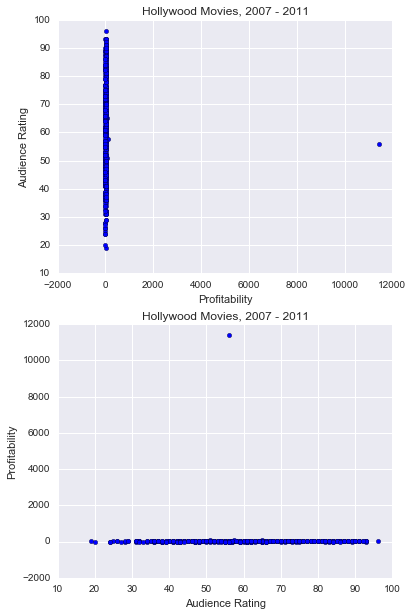

In [132]:
fig = plt.figure(figsize=(6,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.scatter(hollywood_movies["Profitability"], hollywood_movies["Audience Rating"])
ax1.set_ylabel("Audience Rating")
ax1.set_xlabel("Profitability")
ax1.set_title("Hollywood Movies, 2007 - 2011")

ax2.scatter(hollywood_movies["Audience Rating"], hollywood_movies["Profitability"])
ax2.set_ylabel("Profitability")
ax2.set_xlabel("Audience Rating")
ax2.set_title("Hollywood Movies, 2007 - 2011")
plt.show()

# hollywood_movies.describe()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000242D96F080>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000242D8CF358>]], dtype=object)

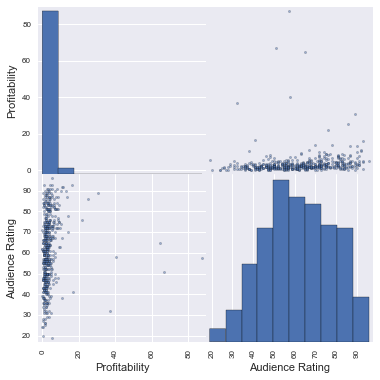

In [133]:

from pandas.tools.plotting import scatter_matrix
normal_movies = hollywood_movies[hollywood_movies["Film"] != "Paranormal Activity"]
scatter_matrix(normal_movies[["Profitability", "Audience Rating"]], figsize=(6,6))

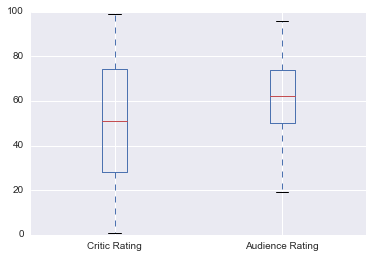

In [134]:
Ratings = normal_movies[["Critic Rating", "Audience Rating"]]
Ratings.plot(kind='box')

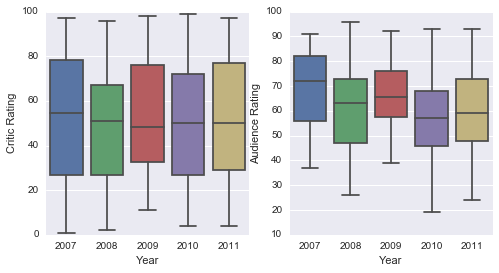

In [135]:
normal_movies = normal_movies.sort_values("Year")
normal_movies.head()

fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.boxplot("Year", "Critic Rating", data=normal_movies, ax=ax1)
sns.boxplot("Year", "Audience Rating", data=normal_movies, ax=ax2)
plt.show()

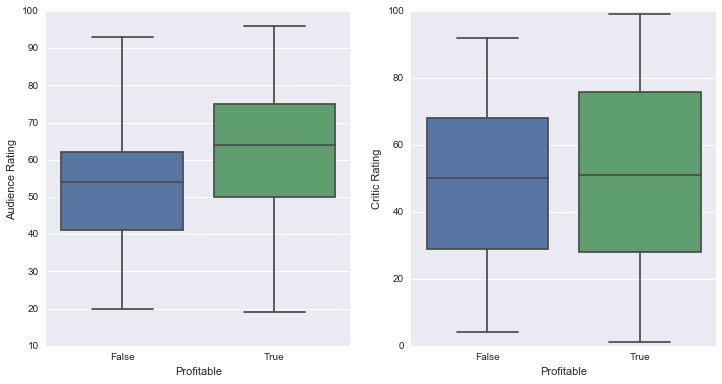

In [137]:
def is_profitable(row):
    if row["Profitability"] <= 1.0:
        return False
    return True
normal_movies["Profitable"] = normal_movies.apply(is_profitable, axis=1)
# print(normal_movies["Profitable"])

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.boxplot(y="Audience Rating", x="Profitable", data=normal_movies, ax=ax1)
sns.boxplot(y="Critic Rating", x="Profitable", data=normal_movies, ax=ax2)